<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import cv2    
import sys 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from keras.preprocessing.image import load_img

In [108]:
main_folder='/content/drive/My Drive/Final_Project/'
images_folder=main_folder + 'face/'
EXAMPLE_PIC = images_folder + '001889.jpg'
IMG_WIDTH=178
IMG_HEIGHT=218
df_attr=pd.read_excel(main_folder+'gender_dataset.xlsx',)

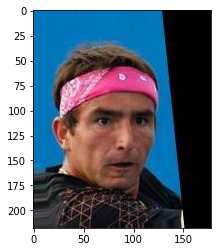

In [109]:
img=load_img(EXAMPLE_PIC)
plt.grid(False)
plt.imshow(img)

In [106]:
faceDetect=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
def load_resize_extractface(fname):
    image=cv2.imread(fname)
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    faces=faceDetect.detectMultiScale(
          image_gray,
          scaleFactor=1.3,
          minNeighbors=3,
          minSize=(10,10)
    )
    for (x, y, w, h) in faces:
      #cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
       roi_color = image[y:y + h, x:x + w]
       return roi_color


TypeError: ignored

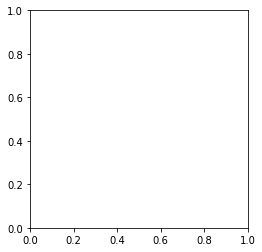

In [107]:
plt.imshow(load_resize_extractface(images_folder + '001889.jpg'))

In [103]:
arr_image=[[]]
for fname in df_attr['Id_image']:
   x=np.array(load_resize_extractface(images_folder + fname))
   print(fname," ",x.shape)
   arr_image.append(x)

000001.jpg   (97, 97, 3)
000002.jpg   (112, 112, 3)
000003.jpg   (103, 103, 3)
000004.jpg   (102, 102, 3)
000005.jpg   (116, 116, 3)
000006.jpg   (102, 102, 3)
000007.jpg   (102, 102, 3)
000008.jpg   (91, 91, 3)
000009.jpg   (105, 105, 3)
000010.jpg   (99, 99, 3)
000011.jpg   (110, 110, 3)
000012.jpg   (113, 113, 3)
000013.jpg   (106, 106, 3)
000014.jpg   (107, 107, 3)
000015.jpg   (108, 108, 3)
000016.jpg   (107, 107, 3)
000017.jpg   (113, 113, 3)
000018.jpg   (104, 104, 3)
000019.jpg   (99, 99, 3)
000020.jpg   (96, 96, 3)
000021.jpg   (99, 99, 3)
000022.jpg   (102, 102, 3)
000023.jpg   (112, 112, 3)
000024.jpg   (106, 106, 3)
000025.jpg   (105, 105, 3)
000026.jpg   (94, 94, 3)
000027.jpg   (102, 102, 3)
000028.jpg   (102, 102, 3)
000029.jpg   (111, 111, 3)
000030.jpg   (95, 95, 3)
000031.jpg   (112, 112, 3)
000032.jpg   (97, 97, 3)
000033.jpg   (99, 99, 3)
000034.jpg   (85, 85, 3)
000035.jpg   (107, 107, 3)
000036.jpg   (108, 108, 3)
000037.jpg   (98, 98, 3)
000038.jpg   (118, 118, 3

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(arr_image,df_attr['Male'], test_size=0.2, random_state=1, shuffle=True)

ValueError: ignored

In [54]:
np.array(x_train).shape

(1600,)

In [51]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
  	cv_results = cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy')
  	results.append(cv_results)
  	names.append(name)
  	print(name, cv_results.mean()) 


LR nan
KNN nan
RF nan
DTC nan
NB nan
SVM nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: setting an array element with a sequence.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on 

AttributeError: ignored